In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import tree as t
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data_meteo = pd.read_excel("Datos/DF_Meteo.xlsx")
data_sin_meteo = pd.read_excel("Datos/DF_SIN_Meteo.xlsx")

In [4]:
data_meteo.columns

Index(['ID', 'FECHA', 'HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR',
       'GRAVEDAD', 'TIPO PERSONA', 'ESTADO PERSONA', 'EDAD', 'SEXO',
       'LOCALIDAD', 'LATITUD', 'LONGITUD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA',
       'HORA_NOM', 'LLUVIA', 'RADIACION'],
      dtype='object')

In [5]:
df_sin_meteo = data_sin_meteo.copy()
df_meteo = data_meteo.copy()


df_meteo = df_meteo[['HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR','GRAVEDAD', 'TIPO PERSONA', 'EDAD', 'SEXO',
       'LOCALIDAD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA', 'LLUVIA', 'RADIACION']]

df_sin_meteo = df_sin_meteo[['HORA', 'CLASE SINIESTRO', 'CHOQUE_CON', 'TIPO LUGAR','GRAVEDAD', 'TIPO PERSONA', 'EDAD', 'SEXO',
       'LOCALIDAD', 'PERSONAS IMPLICADAS', 'DIA_SEMANA']]

df_meteo = df_meteo.dropna(subset=['EDAD']).reset_index(drop=True)
df_sin_meteo = df_sin_meteo.dropna(subset=['EDAD']).reset_index(drop=True)

# CART

1.1. CART: DF Meteo

In [6]:
#Generate binary values using get_dummies
dum_df_meteo = pd.get_dummies(df_meteo, columns=["HORA"], prefix=["HORA_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["CLASE SINIESTRO"], prefix=["CLASE SINIESTR_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["CHOQUE_CON"], prefix=["CHOQUE_CON_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["TIPO LUGAR"], prefix=["TIPO LUGAR_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["TIPO PERSONA"], prefix=["TIPO PERSONA_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["SEXO"], prefix=["SEXO_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["LOCALIDAD"], prefix=["LOCALIDAD_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["DIA_SEMANA"], prefix=["DIA_SEMANA_ES"], dummy_na = True)
dum_df_meteo = pd.get_dummies(dum_df_meteo, columns=["LLUVIA"], prefix=["LLUVIA_ES"], dummy_na = True)
df_meteo = dum_df_meteo.reset_index(drop=True).copy()

#Select outcome variable
x = df_meteo.drop(['GRAVEDAD'],axis=1)
y = df_meteo['GRAVEDAD']

#Define train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=10000)

In [7]:
#Iter by the number of variables in dataframe
prof_meteo = pd.DataFrame()
for i in range(df_meteo.shape[1]):
    cont = i + 1
    prof_meteo.loc[i,'Iter'] = cont
    
    tree = DecisionTreeClassifier(max_depth=cont)
    tree.fit(X_train, y_train)
    
    prof_meteo.loc[i,'Accuracy_Training'] = tree.score(X_train, y_train)
    prof_meteo.loc[i,'Accuracy_Testing'] = tree.score(X_test, y_test)

In [8]:
prof_meteo

,Iter,Accuracy_Training,Accuracy_Testing
0,1.0,0.832242,0.833039
1,2.0,0.832242,0.833039
2,3.0,0.835071,0.836978
3,4.0,0.835181,0.837041
4,5.0,0.843335,0.844479
5,6.0,0.845982,0.845991
6,7.0,0.847164,0.845393
7,8.0,0.848527,0.846433
8,9.0,0.851253,0.846842
9,10.0,0.854373,0.846811


Text(0, 0.5, 'Accuracy')

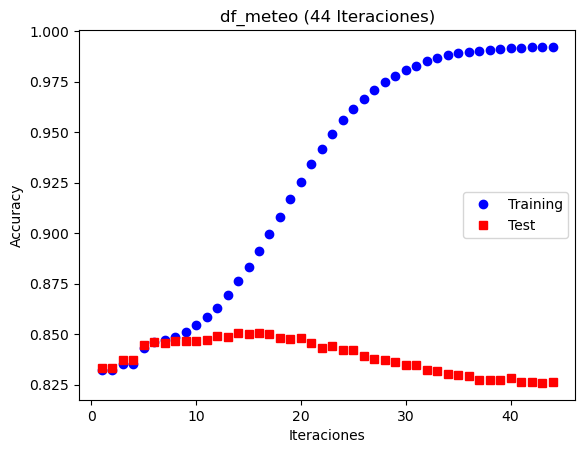

In [9]:
#Get number of nodes by max accuracy on testing
n_nodes = prof_meteo.loc[prof_meteo['Accuracy_Testing'].idxmax()]['Iter']
prof_meteo.loc[prof_meteo['Accuracy_Testing'].idxmax()]
    
#Plot Accuracy vs Iters
plt.plot(prof_meteo['Iter'], prof_meteo['Accuracy_Training'], 'bo', label="Training")
plt.plot(prof_meteo['Iter'], prof_meteo['Accuracy_Testing'], 'rs', label="Test")  
plt.legend(loc="center right")
plt.title("df_meteo (44 Iteraciones)")
plt.xlabel("Iteraciones")
plt.ylabel("Accuracy")

In [10]:
#Final model: CART
tree = DecisionTreeClassifier(max_depth=n_nodes)
tree.fit(X_train, y_train)

print("Iter: ",n_nodes)
print("Training (Accuracy): %f" % tree.score(X_train, y_train))
print("Test (Accuracy): %f" % tree.score(X_test, y_test))

Iter:  14.0
Training (Accuracy): 0.876070
Test (Accuracy): 0.851002


In [11]:
#Confussion Matrix
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Con Heridos       0.80      0.65      0.72      9055
 Con Muertos       0.51      0.16      0.24       253
  Solo Daños       0.87      0.94      0.90     22424

    accuracy                           0.85     31732
   macro avg       0.72      0.58      0.62     31732
weighted avg       0.85      0.85      0.84     31732



<AxesSubplot:>

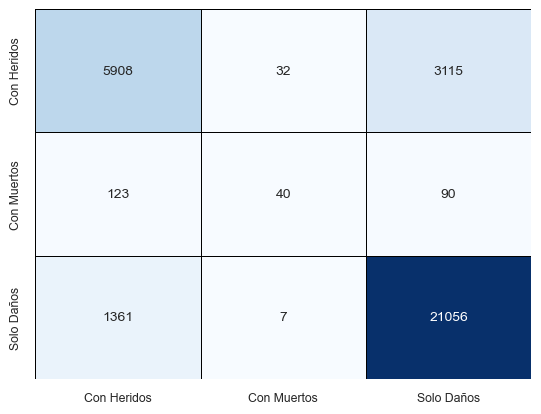

In [12]:
#plt.figure(figsize = (10,7))
y_pred = tree.predict(X_test)
sn.set(font_scale=0.8)
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 10}, 
           linewidth=.5, xticklabels=['Con Heridos','Con Muertos','Solo Daños'],
           yticklabels=['Con Heridos','Con Muertos','Solo Daños'], fmt='g', cmap = 'Blues', linecolor = 'black', cbar = False)

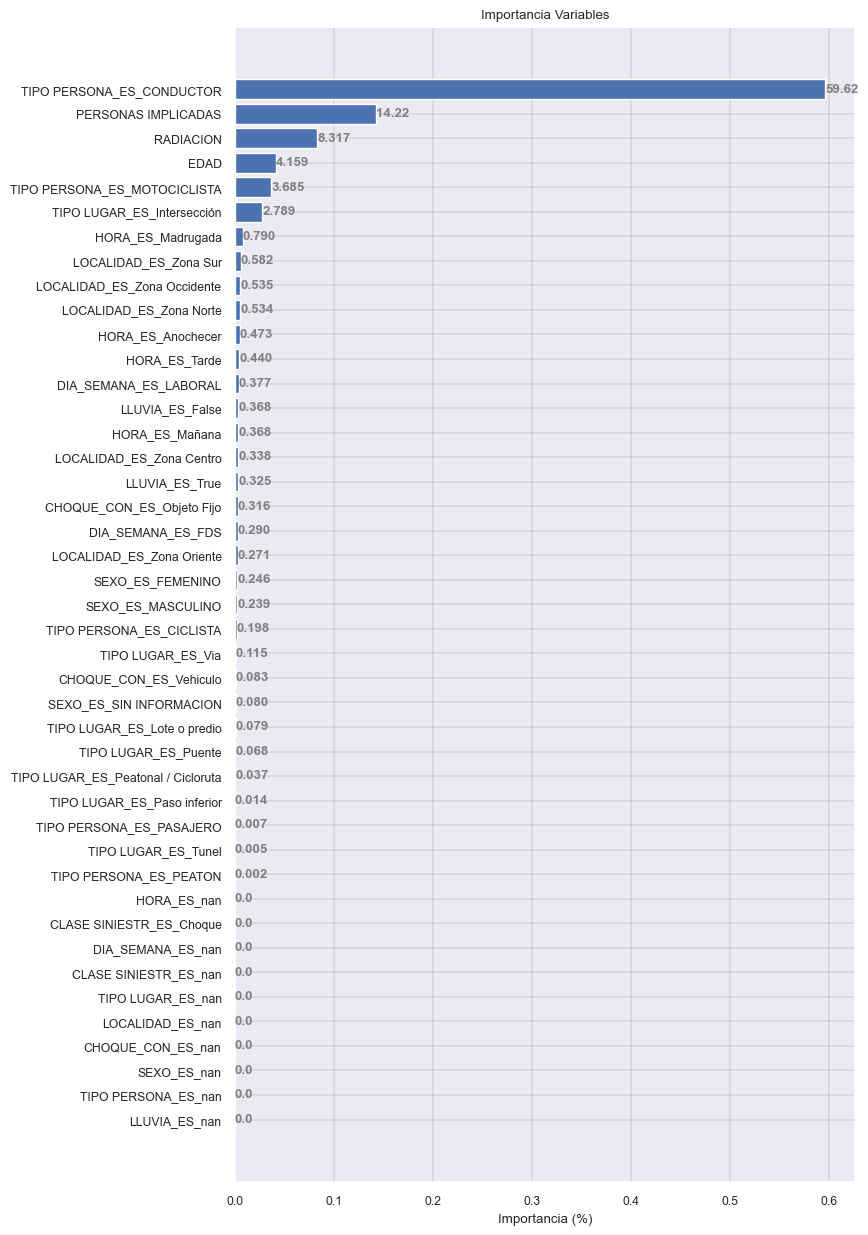

In [13]:
import_meteo = pd.DataFrame({'Variable':x.columns,"Importancia":tree.feature_importances_}).sort_values(by='Importancia',ascending = False)
fig, ax = plt.subplots(figsize=(8,15))

ax.barh(import_meteo['Variable'], import_meteo['Importancia'], align='center', height = 0.8, )
ax.set_yticks(x.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importancia (%)')
ax.set_title('Importancia Variables')
ax.grid(color = 'black', linewidth = 0.1, linestyle='-')
for i, v in enumerate(import_meteo['Importancia']):
    ax.text(x = v, y = i + .1, s = str(v*100)[0:5], color='grey', fontweight='bold')

plt.show()

1.2. CART: DF SIN Meteo

In [13]:
#Generate binary values using get_dummies
dum_df_smeteo = pd.get_dummies(df_sin_meteo, columns=["HORA"], prefix=["HORA_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["CLASE SINIESTRO"], prefix=["CLASE SINIESTR_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["CHOQUE_CON"], prefix=["CHOQUE_CON_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["TIPO LUGAR"], prefix=["TIPO LUGAR_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["TIPO PERSONA"], prefix=["TIPO PERSONA_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["SEXO"], prefix=["SEXO_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["LOCALIDAD"], prefix=["LOCALIDAD_ES"], dummy_na = True)
dum_df_smeteo = pd.get_dummies(dum_df_smeteo, columns=["DIA_SEMANA"], prefix=["DIA_SEMANA_ES"], dummy_na = True)
df_sin_meteo = dum_df_smeteo.reset_index(drop=True).copy()

#Select outcome variable
x = df_sin_meteo.drop(['GRAVEDAD'],axis=1)
y = df_sin_meteo['GRAVEDAD']

#Define train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=10000)

In [14]:
#Iter by the number of variables in dataframe
prof = pd.DataFrame()
for i in range(df_sin_meteo.shape[1]):
    cont = i + 1
    prof.loc[i,'Iter'] = cont
    
    tree = DecisionTreeClassifier(max_depth=cont)
    tree.fit(X_train, y_train)
    
    prof.loc[i,'Accuracy_Training'] = tree.score(X_train, y_train)
    prof.loc[i,'Accuracy_Testing'] = tree.score(X_test, y_test)

In [15]:
prof

,Iter,Accuracy_Training,Accuracy_Testing
0,1.0,0.830903,0.830815
1,2.0,0.830903,0.830815
2,3.0,0.835481,0.834696
3,4.0,0.835701,0.834952
4,5.0,0.844349,0.844691
5,6.0,0.847189,0.847434
6,7.0,0.847978,0.848188
7,8.0,0.848578,0.848202
8,9.0,0.849041,0.848259
9,10.0,0.850018,0.848572


Text(0, 0.5, 'Accuracy')

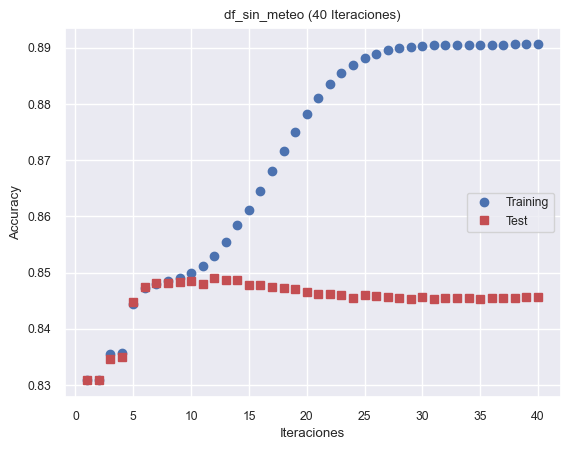

In [16]:
#Get number of nodes by max accuracy on testing
n_nodes = prof.loc[prof['Accuracy_Testing'].idxmax()]['Iter']
prof.loc[prof['Accuracy_Testing'].idxmax()]
    
#Plot Accuracy vs Iters
plt.plot(prof['Iter'], prof['Accuracy_Training'], 'bo', label="Training")
plt.plot(prof['Iter'], prof['Accuracy_Testing'], 'rs', label="Test")  
plt.legend(loc="center right")
plt.title("df_sin_meteo (40 Iteraciones)")
plt.xlabel("Iteraciones")
plt.ylabel("Accuracy")

In [17]:
#Final model: CART
tree = DecisionTreeClassifier(max_depth=n_nodes)
tree.fit(X_train, y_train)

print("Iter: ",n_nodes)
print("Training (Accuracy): %f" % tree.score(X_train, y_train))
print("Test (Accuracy): %f" % tree.score(X_test, y_test))

Iter:  12.0
Training (Accuracy): 0.852940
Test (Accuracy): 0.849112


In [18]:
#Confussion Matrix
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Con Heridos       0.80      0.63      0.70     19656
 Con Muertos       0.72      0.09      0.16       730
  Solo Daños       0.86      0.95      0.90     49951

    accuracy                           0.85     70337
   macro avg       0.79      0.56      0.59     70337
weighted avg       0.84      0.85      0.84     70337



<AxesSubplot:>

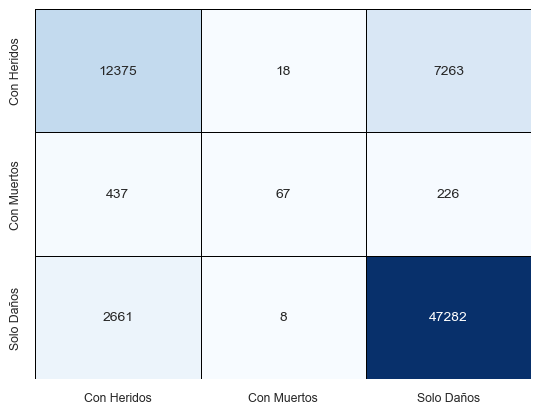

In [19]:
#plt.figure(figsize = (10,7))
y_pred = tree.predict(X_test)
sn.set(font_scale=0.8)
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={"size": 10}, 
           linewidth=.5, xticklabels=['Con Heridos','Con Muertos','Solo Daños'],
           yticklabels=['Con Heridos','Con Muertos','Solo Daños'], fmt='g', cmap = 'Blues', linecolor = 'black', cbar = False)

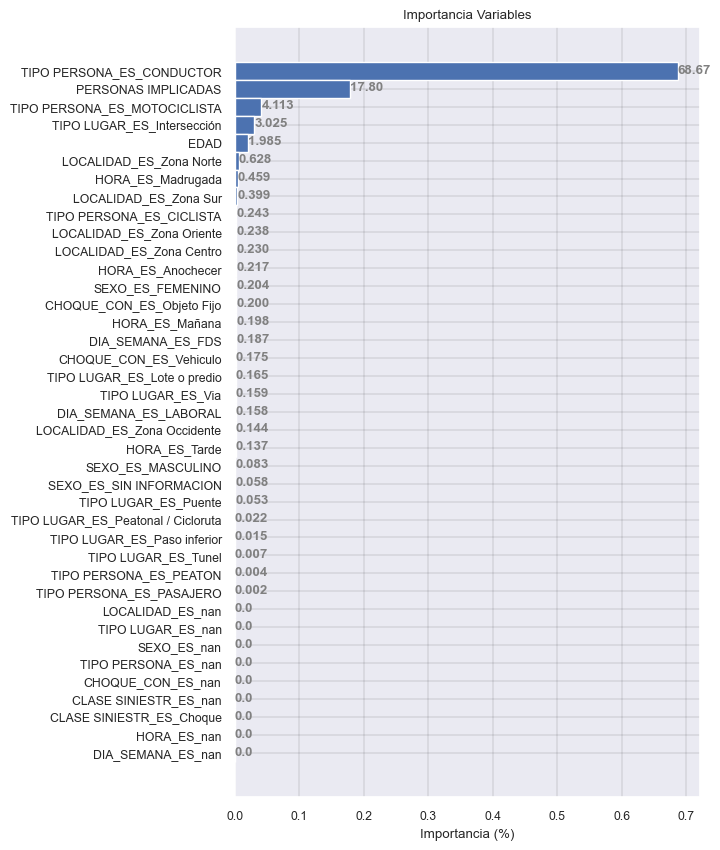

In [25]:
import_sin_meteo = pd.DataFrame({'Variable':x.columns,"Importancia":tree.feature_importances_}).sort_values(by='Importancia',ascending = False)
fig, ax = plt.subplots(figsize=(6,10))

ax.barh(import_sin_meteo['Variable'], import_sin_meteo['Importancia'], align='center', height = 1, )
ax.set_yticks(x.columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importancia (%)')
ax.set_title('Importancia Variables')
ax.grid(color = 'black', linewidth = 0.1, linestyle='-')
for i, v in enumerate(import_sin_meteo['Importancia']):
    ax.text(x = v, y = i + .1, s = str(v*100)[0:5], color='grey', fontweight='bold')

plt.show()

In [26]:
#Export data for models
df_meteo.to_csv("Datos/DF_Meteo_Dummi.csv",index=False,sep=',')
df_sin_meteo.to_csv("Datos/DF_SIN_Meteo_Dummi.csv",index=False,sep=',')